# Chapter 4: Feature Extraction from Images

## Introduction

In the intricate world of image processing and computer vision, images are not just mere visual depictions but a dense collection of data. Every pixel, every hue, every gradient contains information. But how do we decipher the most meaningful patterns or components from an image? This is where **feature extraction** steps in. 

Feature extraction techniques on images involve processes that distill or extract significant information from an image, translating raw data into insightful descriptors. These descriptors could be certain patterns, edges, textures, colors, or any unique characteristics, which, when fed into machine learning models, lead to better understanding and prediction. In essence, feature extraction is about transforming the vast dimensionality of images into a concise and relevant set of features, enabling algorithms to operate efficiently and effectively.

**Learning Objectives:**

At the end of this chapter, you should be able to: 
 
* **Understand the Essence of Features:** Comprehend what constitutes a "feature" in an image and its importance in computer vision tasks. 


* **Familiarize with Popular Techniques:** Explore the commonly used techniques for feature extraction like Singular Value Decomposition (SVD), Fast Fourier Transform (FFT) and 

* **Application in Machine Learning:** Learn how extracted features play a pivotal role in improving the efficiency and accuracy of machine learning models, especially in classification tasks.


* **Hands-on Implementation:** Acquire practical skills by implementing feature extraction methods on real-world image datasets and observing their impacts.


## Singular Value Decomposition with Images

**Singular Value Decomposition (SVD)** is a powerful mathematical tool used in various domains, including image processing.

The SVD provides a systematic way to determine a low-dimensional approximation to **high-dimensional data** in terms of dominant patterns. This technique is data-driven in that patterns are discovered purely from data, without the addition of expert knowledge or intuition.

The SVD is numerically stable and provides a hierarchical representation of the data in terms of a new coordinate system defined by dominant correlations within the data. In the context of images, it can be used for tasks like data compression, noise reduction, and feature extraction.

When it comes to images, SVD plays a role in several practical scenarios:

* **Image Compression:** SVD can be used to compress images by keeping only the significant singular values and their associated vectors. This essentially reduces the amount of information needed to represent the image without a significant loss in quality. This technique is particularly useful for large-scale image databases or when storage space is at a premium.


* **Image Denoising:** SVD can help in denoising images by decomposing them into a sum of rank-1 matrices. Noise in images often affects the smaller singular values, so by eliminating or reducing the singular values below a certain threshold, noise can be effectively reduced.


* **Face Recognition (Eigenfaces):** SVD is used in the eigenfaces technique, which is a popular method in face recognition. The principle here is to represent facial images in a lower-dimensional space using the most significant singular vectors (eigenvectors). This reduces the complexity of the images while retaining the features necessary for recognition.

### Mathematical Formulation:

Generally, we are interested in analyzing a large data set $A \in \mathbb{C}^{n×m} $:

$$
\begin{bmatrix}
    \vert & \vert  & & & \vert\\
    a_1   & a_2  & \dots & & a_m \\
    \vert & \vert
\end{bmatrix}
$$

The columns $a_k \in \mathbb{C}^{n}$  may be measurements from simulations or experiments. For example, columns may represent images that have been reshaped into column vectors with as many elements as pixels in the image.
The column vectors may also represent the state of a physical system that is evolving in time, such as the fluid velocity at a set of discrete points, a set of neural measurements, or the state of a weather simulation with one square kilometer resolution. The index $k$ is a label indicating the kth distinct set of measurements.

The SVD is a unique matrix decomposition that exists for every complex-
valued matrix $A \in \mathbb{C}^{n×m} $:

$$A = U S V^{*}$$

where $U \in \mathbb{C}^{n×n}$  and $V \in \mathbb{C}^{m×m}$ are unitary matrices  with orthonormal columns,
and $S \in \mathbb{C}^{n×m}$ is a matrix with real, non-negative entries on the diagonal and zeros off the diagonal. Here $∗$ denotes the complex conjugate transpose.

### SVD for a random data matrix

Let's see how SVD works for a random data matrix.

In [3]:
# n_rows = int(input("enter n, the number of rows you want in your matrix "))
# m_columns = int(input("enter m,  the number of columns you want in your matrix "))
n_rows = 5
m_columns = 3

In [5]:
import numpy as np

A = np.random.rand(n_rows, m_columns) # Create random data matrix
U, S, VT = np.linalg.svd(A,full_matrices=True) #Full SVD


Let's check the resulting $U$ ,  $S$  and $V^{*}$ obtained from the SVD decomposition.

In [72]:
A

array([[0.22733777, 0.88986389, 0.76100793],
       [0.25693187, 0.4293315 , 0.4519754 ],
       [0.93927304, 0.51632093, 0.02032081],
       [0.8067562 , 0.47867102, 0.04258633],
       [0.83244539, 0.14038274, 0.12241263]])

In [73]:
U

array([[-0.59154103, -0.32959442, -0.63901751, -0.17347939, -0.32094898],
       [-0.50189721,  0.49049104,  0.48650475, -0.05516529, -0.51748203],
       [-0.23794255,  0.44589537, -0.34074272,  0.75130367,  0.25297797],
       [-0.25009825, -0.67197384,  0.44833419,  0.53293327, -0.02967492],
       [-0.52821643,  0.0203601 ,  0.194578  , -0.34407356,  0.75121612]])

In [74]:
#note that Python renders S in form of an array with the singular values.
S

array([2.1487876 , 0.51611434, 0.18977026])

Let's recreate **Sigma** the singular value matrix

In [76]:
Sigma = np.zeros((n_rows, m_columns))
for ind_ in range(len(S)):
    Sigma[ind_,ind_] = S[ind_]
    
Sigma

array([[2.1487876 , 0.        , 0.        ],
       [0.        , 0.51611434, 0.        ],
       [0.        , 0.        , 0.18977026],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [77]:
VT

array([[-0.62785362, -0.43747817, -0.64374892],
       [ 0.77635608, -0.29311452, -0.55799204],
       [-0.05541718,  0.85011571, -0.52367185]])

Lets check if the matrix multiplication $U S V^{*}$ will return $A$

In [78]:
np.matmul(np.matmul(U,Sigma) ,VT )

array([[0.67271781, 0.50284744, 0.97668971],
       [0.8685394 , 0.47609172, 0.5046613 ],
       [0.50326261, 0.10125113, 0.23459083],
       [0.06344646, 0.40908916, 0.49492177],
       [0.71874128, 0.52485916, 0.70547097]])

In [79]:
X

array([[0.67271781, 0.50284744, 0.97668971],
       [0.8685394 , 0.47609172, 0.5046613 ],
       [0.50326261, 0.10125113, 0.23459083],
       [0.06344646, 0.40908916, 0.49492177],
       [0.71874128, 0.52485916, 0.70547097]])

### Matrix Approximation: 

Perhaps the most useful and defining property of the SVD is that it provides an optimal low-rank approximation to a matrix A. In fact, the SVD provides a hierarchy of **low-rank approximations**, since a $rank-r$ approximation is obtained by keeping the leading $r$ singular values and vectors, and discarding the rest. Because S is diagonal, it is possible to express the matrix $A = U S V^{*}$ as a sum of rank-one matrices:
$$
\begin{eqnarray}
A &=& \sum_{k=1}^{m}  \sigma_{k}u_{k}v_{k}^{*} \\
&=& \sigma_{1}u_{1}v_{1}^* +  \sigma_{2}u_{2}v_{2}^* +  \sigma_{3}u_{3}v_{3}^* + \dots +  \sigma_{m}u_{m}v_{m}^*
\end{eqnarray}
$$

where $\sigma_{k}$ is the $k$th diagonal entry of $S$, and $u_{k}$ and $v_{k}$ are the $k$th columns of
$U$ and $V$, respectively. 

This is known as the **dyadic summation**. The singular values $\sigma_{k}$  are arranged in decreasing order, $\sigma_{1} \geq \sigma_{2} \geq \sigma_{3} \geq \sigma_{m} \geq 0$, so each subsequent rank-one matrix $\sigma_{k}u_{k}v_{k}^{*}$ is less important than the previous matrix in capturing the information in $A$. For many systems, the singular values $\sigma_{k}$ decrease rapidly, and it is possible to obtain a good approximation of $A$ by truncating at some rank $r$:

$$
\begin{eqnarray}
A &\approx& \tilde{A}\\
&=& \sum_{k=1}^{r}  \sigma_{k}u_{k}v_{k}^{*} \\
&=& \sigma_{1}u_{1}v_{1}^* +  \sigma_{2}u_{2}v_{2}^* +  \sigma_{3}u_{3}v_{3}^* + \dots +  \sigma_{r}u_{r}v_{r}^*
\end{eqnarray}
$$

Here, we establish the notation that a truncated SVD basis (and the resulting approximated matrix X̃) will be denoted by $\tilde{A} = \tilde{U} \tilde{S} \tilde{V}^{*}$ , where $\tilde{U}$ and $\tilde{V}$ contain the first $r$ columns of $U$ and $V$, and $\tilde{S}$ contains the first $r \times r$ sub-block of $\tilde{S}$. 

The truncated SVD is illustrated in the Figure below  with  $\tilde{U}$,  $\tilde{S}$ and $\tilde{V}$ denoting the truncated matrices. If $A$ does not have full rank, then some of the singular values in $\tilde{U} \tilde{S} \tilde{V}^{*}$ may be zero, and the truncated SVD may still be exact. 

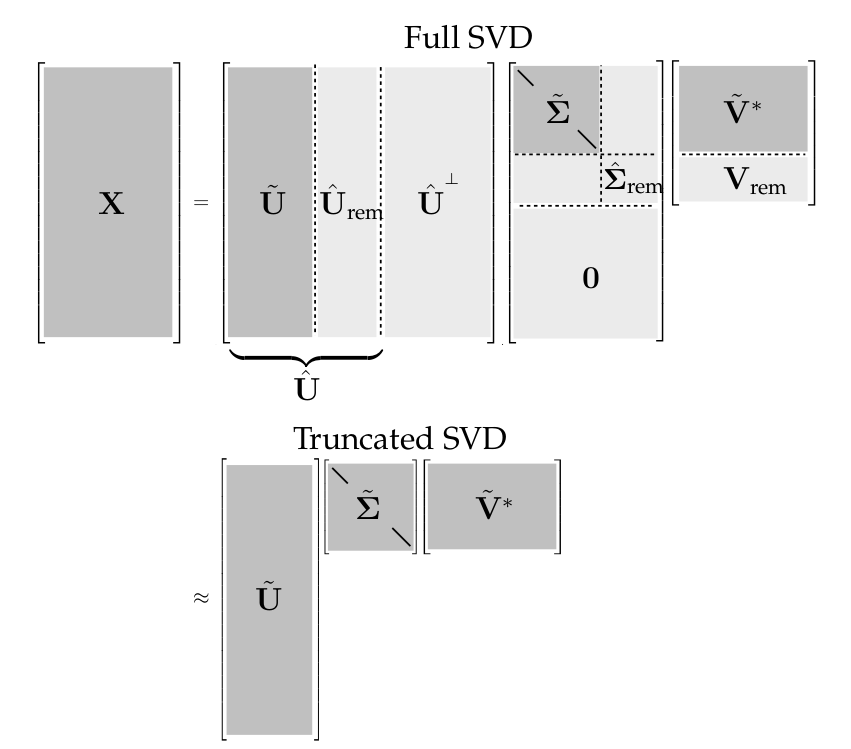

In [91]:
from IPython.display import Image
Image('img/svd_demo.png' , width=500)

However, for truncation values $r$ that are smaller than the number of non-zero singular values (i.e., the rank of X), the truncated SVD only approximates X.  For a given rank r, there is no better approximation for X, in the L-2 sense, than the truncated SVD approximation X̃. There are numerous choices for the truncation rank $r$. Thus, high-dimensional data may be well described by a few dominant patterns given by the columns of $\tilde{U}$ and $\tilde{V}$.

To illustrate that a bit more clearly, let's revisit the above example, but with a new random data matrix

In [6]:
# n_rows = int(input("enter n, the number of rows you want in your matrix "))
# m_columns = int(input("enter m,  the number of columns you want in your matrix "))

n_rows = 5
m_columns = 5
A = np.random.rand(n_rows, m_columns) # Create random data matrix

The function below takes as arguments the data matrix and the $rank-r$ you want the $A$ matrix's approximation for.

In [103]:
def svd_reconstruct(A, r):
    """this function takes the matrix M and the k-th value and return the rank-k approximation"""
    u, s, vh = np.linalg.svd(A, full_matrices=True)
    U_r = u[: , :r]
    s_r = s[:r]
    S_r = np.diag(s_r)
    Vh_r = vh[:r]
    rank_r_approximation = np.dot(U_r, np.dot(S_r, Vh_r))
    return rank_r_approximation

In [104]:
print('the value of the matrix A')
A

the value of the matrix A


array([[0.08291428, 0.98729285, 0.84893215, 0.34497082, 0.27107758],
       [0.72025968, 0.27473624, 0.94858185, 0.30113568, 0.52775644],
       [0.08657511, 0.91816589, 0.22726504, 0.15815159, 0.12030347],
       [0.19116116, 0.41834172, 0.6594646 , 0.99075799, 0.03332705],
       [0.50392567, 0.52915604, 0.93205475, 0.99883681, 0.80058729]])

The **rank-1** approximation is

In [105]:

svd_reconstruct(A , 1)

array([[0.34346026, 0.58389326, 0.76543884, 0.60629911, 0.39990934],
       [0.33367246, 0.56725369, 0.74362565, 0.58902102, 0.38851287],
       [0.19305915, 0.32820663, 0.43025347, 0.34080097, 0.2247892 ],
       [0.31209365, 0.53056903, 0.6955349 , 0.55092865, 0.3633875 ],
       [0.46336674, 0.78773806, 1.03266358, 0.81796608, 0.53952294]])

The **rank-2** approximation is

In [107]:
svd_reconstruct(A , 2)

array([[ 0.14308311,  1.02394567,  0.69360024,  0.48016824,  0.25822483],
       [ 0.4825862 ,  0.24022114,  0.79701375,  0.68275735,  0.49380816],
       [-0.04990372,  0.86178241,  0.34314717,  0.18786379,  0.05299279],
       [ 0.33488623,  0.48051376,  0.70370643,  0.56527584,  0.37950389],
       [ 0.5905359 ,  0.50845925,  1.07825588,  0.89801491,  0.62944287]])

The **rank-3** approximation is

In [108]:
svd_reconstruct(A , 3)

array([[ 0.18875431,  1.03510447,  0.7201474 ,  0.37961013,  0.30435096],
       [ 0.64895505,  0.28086986,  0.89371847,  0.31644916,  0.66183418],
       [-0.02013299,  0.86905626,  0.36045191,  0.12231508,  0.08306006],
       [ 0.13241032,  0.43104305,  0.58601387,  1.01108395,  0.17501115],
       [ 0.56085096,  0.50120636,  1.061001  ,  0.96337472,  0.59946224]])

The **rank-4** approximation is

In [109]:
svd_reconstruct(A , 4)

array([[ 0.19684374,  1.01795564,  0.78714102,  0.36128871,  0.22199087],
       [ 0.65955528,  0.25839836,  0.98150567,  0.29244111,  0.55391104],
       [-0.02866794,  0.88714956,  0.28976862,  0.14164556,  0.16995614],
       [ 0.1443454 ,  0.4057418 ,  0.68485574,  0.98405266,  0.05349771],
       [ 0.54273893,  0.53960217,  0.91100387,  1.00439596,  0.78386453]])

The **rank-5** approximation is

In [110]:
svd_reconstruct(A , 5)

array([[0.08291428, 0.98729285, 0.84893215, 0.34497082, 0.27107758],
       [0.72025968, 0.27473624, 0.94858185, 0.30113568, 0.52775644],
       [0.08657511, 0.91816589, 0.22726504, 0.15815159, 0.12030347],
       [0.19116116, 0.41834172, 0.6594646 , 0.99075799, 0.03332705],
       [0.50392567, 0.52915604, 0.93205475, 0.99883681, 0.80058729]])

In [179]:
U_matrix, Sigma_matrix, Vt_matrix = np.linalg.svd(A, full_matrices=True)

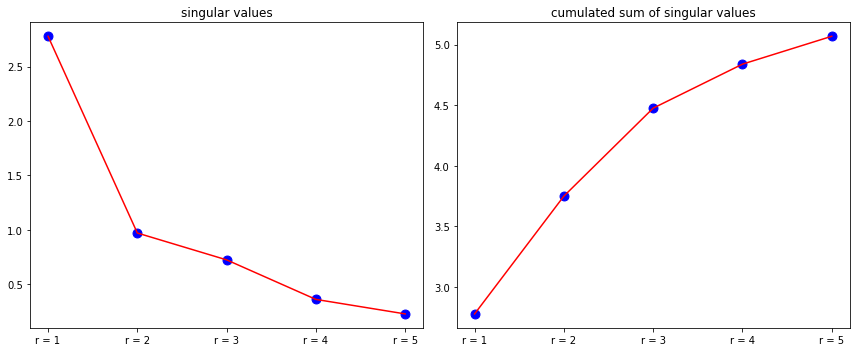

In [215]:
r_labels = ["r = " +str(i) for i in range(1,6)]
gray_image_cv = cv2.cvtColor(image_cv_rgb, cv2.COLOR_RGB2GRAY)
# Displaying the original and grayscale images side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(r_labels,Sigma_matrix , color ='blue', s=80)
plt.plot(r_labels,Sigma_matrix , color ='red' )
plt.title("singular values")

plt.subplot(1, 2, 2)
plt.scatter(r_labels,np.cumsum(Sigma_matrix) , color ='blue', s=80)
plt.plot(r_labels,np.cumsum(Sigma_matrix) , color ='red' )
plt.title("cumulated sum of singular values")

plt.tight_layout()
plt.show()

If you look closely at the different rank-r approximations, you will notice that the full-rank is almost perfect approximation of the random data matrix A.  It's more elegant with data images.

### SVD for an image data matrix

For an image represented as a matrix  $A$, SVD breaks it down into three matrices: $U$ , $S$ and $V^T$. 
Each matrix carries specific properties and information about the original image.

An example of matrix approximation is image compression. A recurring idea among folks is that large data sets
often contain underlying patterns that facilitate **low-rank representations**. Natural images present a simple and intuitive example of this inherent compressibility. 

A grayscale image may be thought of as a real-valued matrix $A \in \mathbb{R}^{n\times m}$ , where $n$ and $m$ are the number of pixels in the vertical and horizontal directions, respectively. 4 Depending on the basis of representation (pixel space, Fourier frequency domain, SVD transform coordinates), images may have very compact approximations.

Consider the image of this Ugandan Woman, in her farm, with her baby at her back.

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path_1 ='data/womanfarmer_andbaby.jpg'

image_cv = cv2.imread(image_path_1)
image_cv_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

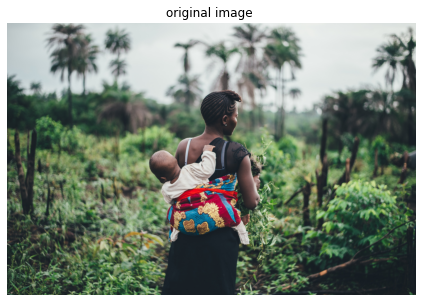

In [82]:
plt.figure(figsize=(10, 5))
plt.imshow(image_cv_rgb)
plt.title("original image ")
plt.axis('off')
plt.show()

In [111]:
print(image_cv_rgb.shape)

(2662, 3999, 3)


This image has **2662 x  3999 pixels** on each channel, which means each channel is $\mathbb{R}^{2662 \times  3999}$ matrix. It is possible to take the SVD of this image and plot the diagonal singular values.  Lets grayscale the original image to ease on the SVD computation.

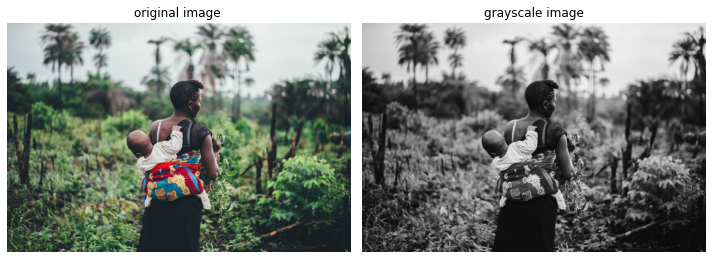

In [112]:
gray_image_cv = cv2.cvtColor(image_cv_rgb, cv2.COLOR_RGB2GRAY)

# Displaying the original and grayscale images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_cv_rgb)
plt.title("original image ")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image_cv, cmap='gray')
plt.title("grayscale image")
plt.axis('off')

plt.tight_layout()
plt.show()

In [113]:
print(gray_image_cv.shape)

(2662, 3999)


Note: It's common to work with grayscale images when dealing with SVD, as it simplifies the matrix operations. Because it is an expensive matrix  multiplication here, it may take a while to produce an output.

In [114]:
U, S, Vt = np.linalg.svd(gray_image_cv, full_matrices=False)


In [116]:
print(S.shape)

(2662,)


As you could see, the image above has  $2662$ singular values. A powerful aspect of SVD is to allow a representation of the original image with a smaller set of values, or using fewer singular values. 

This can be seen as compressing the image, as it preserves useful features of the original image. In particular, singular values represent brightness of an image and a corresponding singular vector describes the geometric characteristics of the image.

### Image Reconstruction with Reduced Dimensions:
Let's randomly choose a set of values for a rank-r approximation of the image matrix or a svd reconstruction of the original image.

In [119]:
r_values = [5, 10, 50, 100 , 200, 1000]

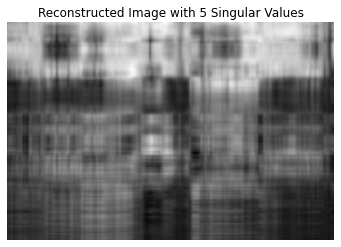

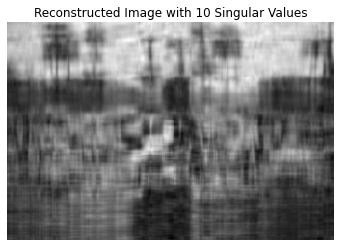

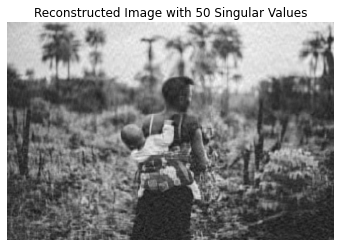

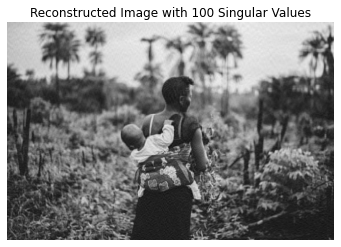

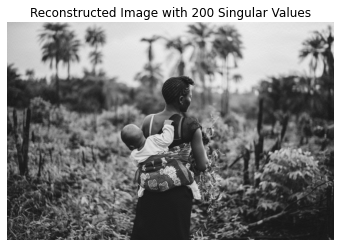

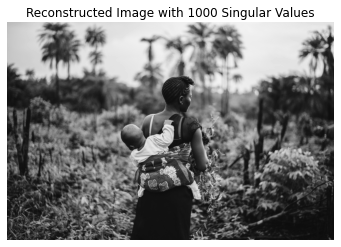

In [120]:
for r in r_values:
    reconstructed_image = svd_reconstruct(gray_image_cv, r)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image with {r} Singular Values')
    plt.axis('off')
    plt.show()


**Explanation:**
By using only a fraction of the singular values (the top-r values given they are sorted in descending order), we can approximate the original image. As $r$ increases, the approximation gets better, but it also requires more data.


**Additional Insights:**
Compression Ratio: The compression ratio can be calculated by comparing the number of singular values used for the reconstruction to the original size of the image.


**Feature Extraction: The columns of the matrix** 

$U$ (called left singular vectors) can be considered as features extracted from the image. These features can be used in various machine learning tasks.

**Noise Reduction:** SVD can also be employed for noise reduction. Noisy pixels usually correspond to the smaller singular values. So, by using only the top-r singular values, one can often retain the main structure of the image while leaving out the noise.

>#### <font color=#800080>Task 6:</font> <a class="anchor" id="Task-1"></a>


Consider this bank cheque image. Repeat the same process as above. 

In [158]:
ChekBank_ = 'data/cheque_bank_01.jpg'

 1. Load the image and visualize it. 
 2. Convert it to grayscale
 3. Perform the singular value decomposition and report on the singular values
 4. Provide some low-rank reconstruction of the image, up to to 10% of singular values
 5. What is the reconstruction error using 25% of the singular values

The top 10% of singular values should allow to reconstruct a good approximation of the image.

>#### <font color=#800080>Task 7:</font> <a class="anchor" id="Task-1"></a>


## Bank Cheque Authentication


In many parts of Africa, paper cheques are still an essential form of transaction, especially for business payments. However, with the rise of banking fraud, there's a need to develop systems that can quickly authenticate cheques based on their features and detect any anomalies.

Imagine you're a data scientist at the `Banque Sahélo-Saharienne pour l'Investissement et le Commerce (BSSIC)` Bank in Niger. The bank receives millions of cheques each day. They want to employ an automated system that uses the singular value decomposition technique to detect potential tampering or forgery in cheques. The goal is to compress the image of the cheque using SVD and compare its low-rank approximation with the original. Any significant discrepancy might indicate tampering.

1. Load a dataset of cheque images.

For each cheque image:

2. Convert the image into a grayscale matrix.
3. Compute the singular value decomposition of the image matrix using NumPy.
4. Create a low-rank approximation of the image by retaining only the 60% of singular values. How many singular values does that represent?
    
5. Measure the difference between the original image and its approximation. Use this to flag potential anomalies considering the mean square reconstruction error threshold at **1.2**.
    
6. Display and Report the cheques with anomalies for further verification.

>#### <font color=#800080>Task 8:</font> <a class="anchor" id="Task-1"></a>

## Personalizing Digital Advertisements


The digital marketing landscape in Africa is rapidly evolving with businesses aiming to offer personalized content to users. To achieve this, companies are looking into advanced image processing techniques to tailor visual ads to individual preferences and historical interactions.

You're working at **AfriAds**, a leading digital marketing agency. The company believes that the most effective advertisements are the simplest, and using SVD can help determine the most prominent features of an advertisement image. By creating low-rank approximations, they hope to generate simpler versions of ads that retain their core essence and message.


1. Load a dataset of advertisement images that have had various levels of user engagement.

For each advertisement image:

2. Convert the image into a grayscale matrix.

3. Provide an efficient resize of the actual image.

4. Compute the singular value decomposition of the image matrix using NumPy.

5. Generate low-rank approximations of the ad image by keeping varying numbers of top singular values (e.g., 5%, 10%, 20% of singular values).

6. **Store, Render** and **visually inspect** these approximations to determine which version retains the advertisement's main features while being simpler.

7. Analyze user engagement metrics for these simpler ads, comparing them with the original versions to determine if simpler ads (via low-rank approximations) perform better in user engagement.
